6.1 Reading and Writing Data in Text Format

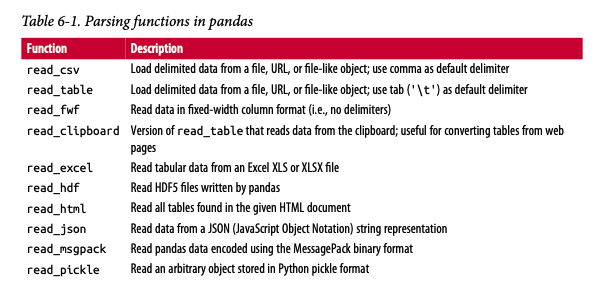

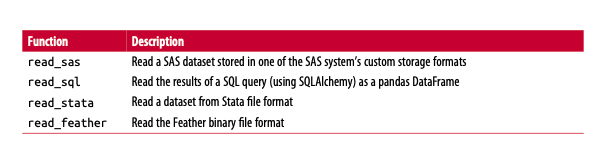

In [4]:
import pandas as pd

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_25744/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
!cat examples/ex1.csv

cat: examples/ex1.csv: No such file or directory


In [5]:
frame= pd.read_csv('ex1.csv')

In [7]:
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
frame2= pd.read_table('ex1.csv', sep=',')
frame2

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [12]:
df = pd.read_csv('ex2.csv', header= None)
df

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [15]:
df = pd.read_csv('ex1.csv', names= ['a', 'b', 'c', 'dd', 'message']) #column names can be overwritten
df

,a,b,c,dd,message
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [20]:
df = pd.read_csv('ex2.csv', names= ['a', 'b', 'c', 'd','message'], index_col='message') #column names can be overwritten
df

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [24]:
df= pd.read_csv('examples.csv', index_col=['key1', 'key2'])
df

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [35]:
result = pd.read_table('examples.txt',sep='\s+')
result

,A,B,"C\,"
aaa,-0.264438,-1.026059,"-0.619500,"
bbb,0.927272,0.302904,"-0.032399,"
ccc,-0.264273,-0.386314,"-0.217601,"
ddd,-0.871858,-0.348382,1.100491


In [37]:
result = pd.read_table('example_files/ex4.csv')
result

,# hey!
0,"a,b,c,d,message"
1,# just wanted to make things more difficult fo...
2,"5,6,7,8,world"
3,"9,10,11,12,foo"


In [42]:
result = pd.read_csv('example_files/ex4.csv', skiprows= [0,2])
result

,a,b,c,d,message
0,5,6,7,8,world
1,9,10,11,12,foo


In [43]:
result = pd.read_csv('example_files/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [47]:
pd.read_csv('example_files/ex5.csv')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [45]:
result.isnull()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [46]:
# some values can be assigned as null

sentinels = {'message':['foo', 'Nan'], 'something': ['one']}
pd.read_csv('example_files/ex5.csv', na_values= sentinels)

,something,a,b,c,d,message
0,NaN,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


![Screenshot 2024-02-22 at 7.24.55 PM.png](<attachment:Screenshot 2024-02-22 at 7.24.55 PM.png>)
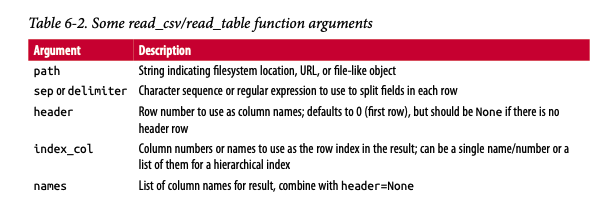

![Screenshot 2024-02-22 at 7.25.29 PM.png](<attachment:Screenshot 2024-02-22 at 7.25.29 PM.png>)
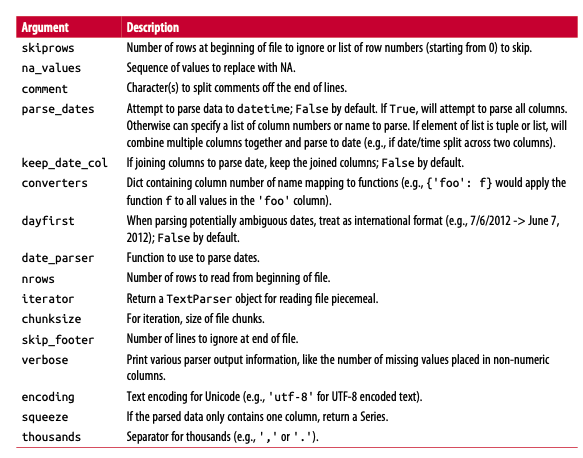

Reading Text Files in Pieces

In [48]:
pd.options.display.max_rows= 10

In [49]:
import numpy as np

In [51]:
df= pd.DataFrame(np.random.randn(10000,4), columns=['one','two','three', 'four'])


In [52]:
df.to_csv('example_files/ex6.csv')

In [53]:
df= pd.read_csv('example_files/ex6.csv')
df

,Unnamed: 0,one,two,three,four
0,0,0.605197,-0.887328,0.402820,-2.908176
1,1,-1.694477,-1.133491,1.074378,0.178154
2,2,0.055004,0.004686,0.314813,-0.187201
3,3,0.235917,-1.914452,2.087742,0.489286
4,4,-1.598202,-0.486449,0.156227,0.982529
...,...,...,...,...,...
9995,9995,1.622697,-1.565201,0.962891,-0.326935
9996,9996,0.296675,1.205246,-0.013514,1.811250
9997,9997,1.411331,0.220928,0.239602,-0.053452
9998,9998,0.537343,-0.467886,-1.107901,0.175885


In [55]:
df= pd.read_csv('example_files/ex6.csv', nrows= 5)
df

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [66]:
chunker = pd.read_csv('example_files/ex6.csv', chunksize= 1000)
chunker

In [67]:
tot= pd.Series()
for chunk in chunker:
    tot = tot.add(chunk['key'].value_counts(), fill_value= 0)

tot=tot.sort_values(ascending= False)

In [71]:
tot

key
E    368
X    364
L    346
O    343
Q    340
    ... 
5    157
2    152
0    151
9    150
1    146
Length: 36, dtype: object

In [69]:
df= pd.read_csv('example_files/ex6.csv')
df['key'].unique()

array(['L', 'B', 'G', 'R', 'Q', 'U', 'K', 'S', '8', '1', 'P', 'J', 'E',
       'A', 'F', 'H', 'W', 'C', 'V', 'I', '6', 'Y', 'T', 'M', 'X', 'N',
       'O', 'Z', '2', 'D', '7', '0', '4', '5', '3', '9'], dtype=object)

Writing Data to Text Format

In [73]:
data = pd.read_csv('example_files/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [75]:
data.to_csv('example_files/out.csv')

In [76]:
!cat example_files/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [78]:
# using a different delimitter
import sys

data.to_csv(sys.stdout, sep= '|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [79]:
#showimg missing values 
data.to_csv(sys.stdout, sep= '|', na_rep= 'NULL')

|something|a|b|c|d|message
0|one|1|2|3.0|4|NULL
1|two|5|6|NULL|8|world
2|three|9|10|11.0|12|foo


In [80]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [81]:
data.to_csv(sys.stdout, index= False, header = False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [82]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [84]:
data.to_csv(sys.stdout, index= False, columns=['a', 'b', 'c']) #saving partial data to csv.

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [85]:
dates = pd.date_range('1/1/2000', periods= 7)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

In [86]:
ts= pd.Series(range(7), index= dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int64

In [88]:
ts.to_csv('example_files/tseries.csv')

!cat example_files/tseries.csv

,0
2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


Working with delimited Formats

In [89]:
!cat example_files/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


For any file with a single-character delimiter, you can use Python’s built-in csv mod‐ ule. To use it, pass any open file or file-like object to csv.reader:

In [90]:
import csv
f= open('example_files/ex7.csv')

reader = csv.reader(f)

for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [92]:
with open('example_files/ex7.csv') as f:
    lines = list(csv.reader(f))

In [98]:
lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [108]:
header, values= lines[0], lines[1:]

data_dict= {h:v for h,v in zip(header, zip(*values))}

In [110]:
list(zip(header, zip(*values)))

[('a', ('1', '1')), ('b', ('2', '2')), ('c', ('3', '3'))]

In [111]:
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [101]:
values

[['1', '2', '3'], ['1', '2', '3']]

In [105]:
list(zip(values))

[(['1', '2', '3'],), (['1', '2', '3'],)]

In [106]:
list(zip(*values))

[('1', '1'), ('2', '2'), ('3', '3')]

In [107]:
#learning from chatgpt

# Example list of lists
data = [
    [1, 'Alice', 25],
    [2, 'Bob', 30],
    [3, 'Charlie', 22]
]

# Using zip with the * operator to zip the list of lists
zipped_data = list(zip(*data))

# Displaying the result
print(zipped_data)

# The zip(*data) is equivalent to zip([1, 'Alice', 25], [2, 'Bob', 30], [3, 'Charlie', 22]).
# The * operator unpacks the list of lists, passing each inner list as a separate argument to the zip function.
# The resulting zipped_data is a list of tuples, where each tuple contains the elements from the same position in the original lists.

[(1, 2, 3), ('Alice', 'Bob', 'Charlie'), (25, 30, 22)]


CSV files come in many different flavors. To define a new format with a different delimiter, string quoting convention, or line terminator, we define a simple subclass of csv.Dialect:

In [115]:
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar= '"'
    quoting = csv.QUOTE_MINIMAL

f= open('example_files/ex7.csv')
reader = csv.reader(f, dialect=my_dialect)

lines = list(reader)

In [116]:
lines

[['a,"b","c"'], ['1,"2","3"'], ['1,"2","3"']]

In [120]:
f= open('example_files/ex7.csv')
reader = csv.reader(f, delimiter='|')

lines = list(reader)

In [121]:
lines

[['a,"b","c"'], ['1,"2","3"'], ['1,"2","3"']]

In [125]:
#write data to csv

with open('example_files/my_data.csv', mode='w') as f:
    writer = csv.writer(f, dialect= my_dialect)
    writer.writerow(('one', 'two', 'three')) 
    writer.writerow(('1', '2', '3')) 
    writer.writerow(('4', '5', '6')) 
    writer.writerow(('7', '8', '9'))

JSON DATA

In [126]:
obj = """
    {"name": "Wes",
     "places_lived": ["United States", "Spain", "Germany"],
     "pet": null,
     "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
                  {"name": "Katie", "age": 38,
                   "pets": ["Sixes", "Stache", "Cisco"]}]
} """

In [127]:
import json

result= json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [128]:
#Reverse
asjson = json.dumps(result)

In [132]:
siblings= pd.DataFrame(result['siblings'], columns=['pets'])

In [133]:
siblings

,pets
0,"[Zeus, Zuko]"
1,"[Sixes, Stache, Cisco]"


In [135]:
siblings= pd.DataFrame(result['siblings'],)
siblings

,name,age,pets
0,Scott,30,"[Zeus, Zuko]"
1,Katie,38,"[Sixes, Stache, Cisco]"


In [137]:
import pandas as pd

In [139]:
data=pd.read_json('example_files/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [141]:
print(data.to_json()) # for saving pandas to json

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


XML and HTML: Web Scraping

In [142]:
conda install lxml
pip install beautifulsoup4 html5lib

SyntaxError: invalid syntax (2425780181.py, line 1)

In [150]:
table= pd.read_html('example_files/fdic_failed_bank_list.html')

In [151]:
len(table)
failures= table[0]

In [152]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [153]:
#group by year

close_timestamps= pd.to_datetime(failures['Updated Date'])
close_timestamps.dt.year.value_counts()

Updated Date
2012    227
2014    109
2016     91
2015     66
2013     36
       ... 
2004      2
2003      2
2010      1
2006      1
2002      1
Name: count, Length: 12, dtype: int64

Parsing XML with lxml.objectify

6.2 Binary Data Formats/

One of the easiest ways to store data (also known as serialization) efficiently in binary format is using Python’s built-in pickle serialization.

In [157]:
frame = pd.read_csv('example_files/ex1.csv')

In [158]:
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [159]:
frame.to_pickle('example_files/frame_pickle')
pd.read_pickle('example_files/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [163]:
import h5py

In [165]:
# frame= pd.DataFrame({'a': np.random.randn(10000)})
# store= pd.HDFStore('my_data.h5')
# store['obj1']= frame
# store['obj_col1']= frame['a']
# store

6.3 Interacting with Web APIs

Many websites have public APIs providing data feeds via JSON or some other format.\
There are a number of ways to access these APIs from Python; one easy-to-use method that I recommend is the requests package.

In [167]:
import requests

/Users/saurabhverma/Documents/GitHub/My_python_journey/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [168]:
url= 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp= requests.get(url)
resp

<Response [200]>

In [170]:
data= resp.json()
data

[{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/57628',
  'repository_url': 'https://api.github.com/repos/pandas-dev/pandas',
  'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/57628/labels{/name}',
  'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/57628/comments',
  'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/57628/events',
  'html_url': 'https://github.com/pandas-dev/pandas/pull/57628',
  'id': 2153017430,
  'node_id': 'PR_kwDOAA0YD85n2oGJ',
  'number': 57628,
  'title': 'BUG: Unexpected behaviour when inserting timestamps into Series #57596',
  'user': {'login': 'wleong1',
   'id': 122815453,
   'node_id': 'U_kgDOB1ID3Q',
   'avatar_url': 'https://avatars.githubusercontent.com/u/122815453?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/wleong1',
   'html_url': 'https://github.com/wleong1',
   'followers_url': 'https://api.github.com/users/wleong1/followers',
   'following_url': 'h

In [172]:
data[0]['title']

'BUG: Unexpected behaviour when inserting timestamps into Series #57596'

In [176]:
frame = pd.DataFrame(data)
frame

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,closed_at,author_association,active_lock_reason,draft,pull_request,body,reactions,timeline_url,performed_via_github_app,state_reason
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/57628,2153017430,PR_kwDOAA0YD85n2oGJ,57628,BUG: Unexpected behaviour when inserting times...,...,None,NONE,None,False,{'url': 'https://api.github.com/repos/pandas-d...,- [x] closes #57596 \r\n- [ ] [Tests added and...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/57627,2152979508,PR_kwDOAA0YD85n2gcT,57627,"DEPR: remove deprecated units ‘H’, ’T’, and sm...",...,None,CONTRIBUTOR,None,True,{'url': 'https://api.github.com/repos/pandas-d...,xref #54061\r\n\r\n removed deprecated units `...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/57625,2152961295,PR_kwDOAA0YD85n2c3u,57625,remove check to enforce ES01 errors,...,None,CONTRIBUTOR,None,False,{'url': 'https://api.github.com/repos/pandas-d...,- [x] closes https://github.com/pandas-dev/pan...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/57624,2152897375,I_kwDOAA0YD86AUptf,57624,Potential regression induced by PR #57534,...,None,MEMBER,None,NaN,NaN,PR #57534 may have induced a performance regre...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/57620,2152890684,I_kwDOAA0YD86AUoE8,57620,Potential regression induced by PR #57302,...,None,MEMBER,None,NaN,NaN,PR #57302 may have induced a performance regre...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/57594,2151926578,I_kwDOAA0YD86AQ8sy,57594,BUG: df.plot makes a shift to the right if fre...,...,None,CONTRIBUTOR,None,NaN,NaN,This bug exists on the latest version of panda...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None
26,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.githu

In [177]:
issues= pd.DataFrame(data, columns=['number', 'title', 'labels','state'])
issues

,number,title,labels,state
0,57628,BUG: Unexpected behaviour when inserting times...,[],open
1,57627,"DEPR: remove deprecated units ‘H’, ’T’, and sm...","[{'id': 49597148, 'node_id': 'MDU6TGFiZWw0OTU5...",open
2,57625,remove check to enforce ES01 errors,[],open
3,57624,Potential regression induced by PR #57534,"[{'id': 8935311, 'node_id': 'MDU6TGFiZWw4OTM1M...",open
4,57620,Potential regression induced by PR #57302,"[{'id': 8935311, 'node_id': 'MDU6TGFiZWw4OTM1M...",open
...,...,...,...,...
25,57594,BUG: df.plot makes a shift to the right if fre...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
26,57593,DOC: Documentation website says version 2.2 is...,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
27,57592,BUG: DataFrame([Series with different Categori...,"[{'id': 78527356, 'node_id': 'MDU6TGFiZWw3ODUy...",open
28,57591,PERF: groupby.first and groupby.last fallback ...,"[{'id': 233160, 'node_id': 'MDU6TGFiZWwyMzMxNj...",open
